In [1]:
import numpy as np 
from numpy.linalg import norm
from matplotlib import pyplot as plt 
from scipy.integrate import odeint, solve_ivp

In [2]:
def f(t,x):
    dydt = x**2
    # dydt = -np.exp(-x)
    return dydt

In [3]:
def y(t):
    y = 1/3 * t**3 + 0
    # y = np.exp(-x)
    return y

In [4]:
def dvdt(t,v):
    return 3*v**2 - 5
v0 = 0

t = np.linspace(0,1,100)
sol_m1 = odeint(dvdt,y0=v0, t=t, tfirst=True) #returns a 2D array
sol_m2 = solve_ivp(dvdt, t_span=(0,max(t)), y0=[v0], t_eval=t)

sol1 = sol_m1.T[0] #transpose and take first element (since it's not a system of ODE) --> velocities as a function of time
sol2 = sol_m2.y[0]

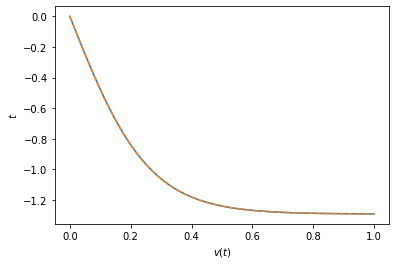

In [5]:
plt.figure()
plt.plot(t,sol1)
plt.plot(t,sol2, '--')
plt.xlabel('$v(t)$')
plt.ylabel('$t$')
plt.show()

In [6]:
# Coupled ODEs
def dSdx(x, S):
    y1, y2 = S
    return [y1+y2**2+3*x, 
            3*y1+y2**3-np.cos(x)]
y1_0 = 0
y2_0 = 0
S_0 = (y1_0, y2_0)

x = np.linspace(0,1,100)
sol = odeint(dSdx, y0=S_0, t=x, tfirst=True)

y1_sol = sol.T[0]
y2_sol = sol.T[1]

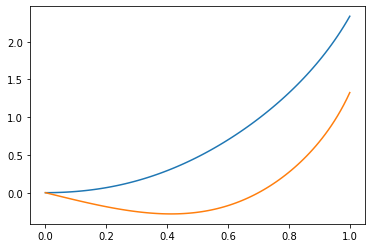

In [7]:
plt.figure()
plt.plot(x, y1_sol)
plt.plot(x, y2_sol)
plt.show()

In [10]:
# y'(t) = f(t),   where f(t) = y' = t**2
t0, tN, h = -1, 1, 0.02
t = np.arange(t0, tN+h, h)
y0 = y(t0)

# solution: y(t) = 1/3 * t**3 + C
y_true = y(t) # y = 1/3 * t**3 + 0

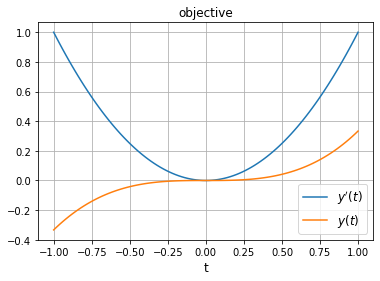

In [18]:
plt.plot(t,f(None,t), label="$y^\prime(t)$")
plt.plot(t,y(t), label='$y(t)$')
plt.grid()
plt.xlabel('t', fontsize='large')
plt.legend(loc='best',fontsize='large')
plt.title('objective')
plt.show()

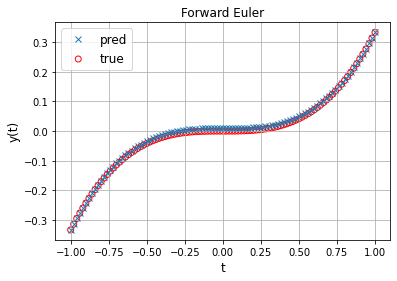

The L2-norm is: 0.0736397636546367


In [12]:
# Forward Euler
y_pred_FE = np.zeros(len(t))
y_pred_FE[0] = y0
for n in range(len(y_pred_FE)-1):
    y_pred_FE[n+1] = y_pred_FE[n] + h*f(None, t[n])
error = norm([y_true - y_pred_FE],2)

plt.figure()
plt.scatter(t,y_true,facecolors='none', edgecolors='r',label='true')
plt.plot(t,y_pred_FE, marker='x',linestyle='',label='pred')
plt.grid()
plt.xlabel('t', fontsize='large')
plt.ylabel('y(t)', fontsize='large')
plt.legend(loc='best',fontsize='large')
plt.title('Forward Euler')
plt.show()
print('The L2-norm is: {0}'.format(error))

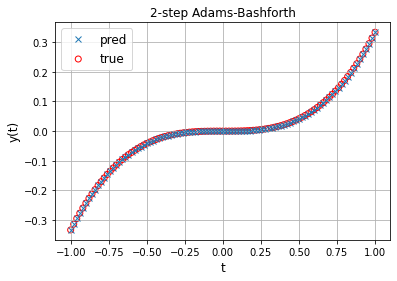

The L2-norm is: 0.0020388013907957706


In [13]:
# Adams-Bashforth method (two-step method)
y_pred_AB2 = np.zeros(len(t))
y_pred_AB2[0] = y0
y_pred_AB2[1] = y_pred_AB2[0] + h*f(None, t[0]) # second init. cond., yn+1 is forward euler one step
for n in range(len(y_pred_AB2)-2):
    y_pred_AB2[n+2] = y_pred_AB2[n+1] + h*(3/2*f(None, t[n+1]) - 1/2*f(None, t[n]))
error = norm([y_true - y_pred_AB2],2)

plt.figure()
plt.scatter(t,y_true,facecolors='none', edgecolors='r',label='true')
plt.plot(t,y_pred_AB2, marker='x',linestyle='',label='pred')
plt.grid()
plt.xlabel('t', fontsize='large')
plt.ylabel('y(t)', fontsize='large')
plt.legend(loc='best',fontsize='large')
plt.title('2-step Adams-Bashforth')
plt.show()
print('The L2-norm is: {0}'.format(error))

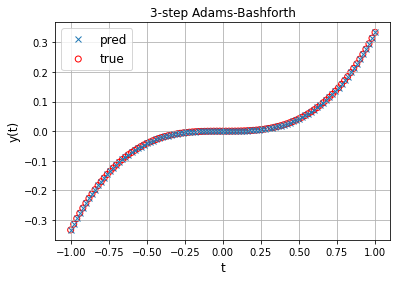

The L2-norm is: 0.003907338963765883


In [14]:
# Adams-Bashforth method (three-step method)
y_pred_AB3 = np.zeros(len(t))
y_pred_AB3[0] = y0
y_pred_AB3[1] = y_pred_AB3[0] + h*f(None, t[0]) # second init. cond., yn+1 is forward euler one step
y_pred_AB3[2] = y_pred_AB3[1] + h*(3/2*f(None, t[1]) - 1/2*f(None, t[0])) # third init. cond., yn+2 is two step Adams Bashforth
for n in range(len(y_pred_AB3)-3):
    y_pred_AB3[n+3] = y_pred_AB3[n+2] + h*(23/12*f(None, t[n+2]) - 16/12*f(None, t[n+1]) + 5/12*f(None, t[n]))
error = norm([y_true - y_pred_AB3],2)

plt.figure()
plt.scatter(t,y_true,facecolors='none', edgecolors='r',label='true')
plt.plot(t,y_pred_AB3, marker='x',linestyle='',label='pred')
plt.grid()
plt.xlabel('t', fontsize='large')
plt.ylabel('y(t)', fontsize='large')
plt.legend(loc='best',fontsize='large')
plt.title('3-step Adams-Bashforth')
plt.show()
print('The L2-norm is: {0}'.format(error))

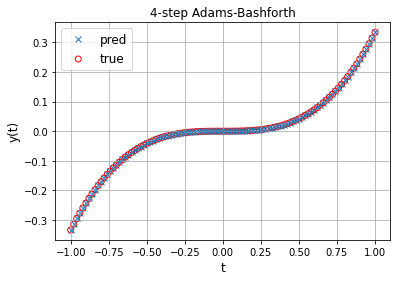

The L2-norm is: 0.003907338963765317


In [15]:
# Adams-Bashforth method (four-step method)
y_pred_AB4 = np.zeros(len(t))
y_pred_AB4[0] = y0 
y_pred_AB4[1] = y_pred_AB4[0] + h*f(None, t[0]) # second init. cond., yn+1 is forward euler one step
y_pred_AB4[2] = y_pred_AB4[1] + h*(3/2*f(None, t[1]) - 1/2*f(None, t[0])) # third init. cond., yn+2 is two step Adams Bashforth
y_pred_AB4[3] = y_pred_AB4[2] + h*(23/12*f(None, t[2]) - 16/12*f(None, t[1]) + 5/12*f(None, t[0])) # fourth init. cond, yn+3
for n in range(len(y_pred_AB4)-4):
    y_pred_AB4[n+4] = y_pred_AB4[n+3] + h*(55/24*f(None, t[n+3]) - 59/24*f(None, t[n+2]) + 37/24*f(None, t[n+1]) - 9/24*f(None, t[n]))
error = norm([y_true - y_pred_AB4],2)

plt.figure()
plt.scatter(t,y_true,facecolors='none', edgecolors='r',label='true')
plt.plot(t,y_pred_AB4, marker='x',linestyle='',label='pred')
plt.grid()
plt.xlabel('t', fontsize='large')
plt.ylabel('y(t)', fontsize='large')
plt.legend(loc='best',fontsize='large')
plt.title('4-step Adams-Bashforth')
plt.show()
print('The L2-norm is: {0}'.format(error))

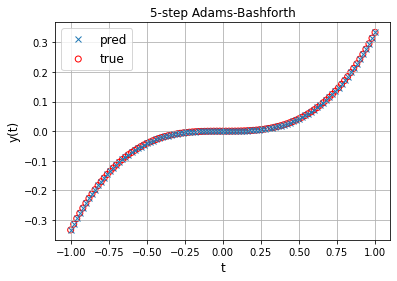

The L2-norm is: 0.003907338963765619


In [16]:
# Adams-Bashforth method (five-step method)
y_pred_AB5 = np.zeros(len(t))
y_pred_AB5[0] = y0
y_pred_AB5[1] = y_pred_AB5[0] + h*f(None, t[0]) # second init. cond., yn+1 is forward euler one step
y_pred_AB5[2] = y_pred_AB5[1] + h*(3/2*f(None, t[1]) - 1/2*f(None, t[0])) # third init. cond., yn+2 is two step Adams Bashforth
y_pred_AB5[3] = y_pred_AB5[2] + h*(23/12*f(None, t[2]) - 16/12*f(None, t[1]) + 5/12*f(None, t[0])) # fourth init. cond, yn+3
y_pred_AB5[4] = y_pred_AB5[3] + h*(55/24*f(None, t[3]) - 59/24*f(None, t[2]) + 37/24*f(None, t[1]) - 9/24*f(None, t[0])) # fifth init. cond.
for n in range(len(y_pred_AB5)-5):
    y_pred_AB5[n+5] = y_pred_AB5[n+4] + h*(1901/720*f(None, t[n+4]) - 2774/720*f(None, t[n+3]) + 2616/720*f(None, t[n+2]) - 1274/720*f(None, t[n+1]) + 251/720*f(None, t[n]))
error = norm([y_true - y_pred_AB5],2)

plt.figure()
plt.scatter(t,y_true,facecolors='none', edgecolors='r',label='true')
plt.plot(t,y_pred_AB5, marker='x',linestyle='',label='pred')
plt.grid()
plt.xlabel('t', fontsize='large')
plt.ylabel('y(t)', fontsize='large')
plt.legend(loc='best',fontsize='large')
plt.title('5-step Adams-Bashforth')
plt.show()
print('The L2-norm is: {0}'.format(error))

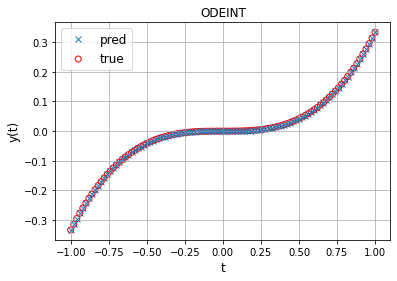

The L2-norm is: 6.723894926395458e-09


In [17]:
# ODEInt as Benchmark
sol = odeint(f,y0,t)
error = norm([y_true - sol.T[0]],2)

plt.figure()
plt.scatter(t,y_true,facecolors='none', edgecolors='r',label='true')
plt.plot(t,sol, marker='x',linestyle='',label='pred')
plt.grid()
plt.xlabel('t', fontsize='large')
plt.ylabel('y(t)', fontsize='large')
plt.legend(loc='best',fontsize='large')
plt.title('ODEINT')
plt.show()
print('The L2-norm is: {0}'.format(error))